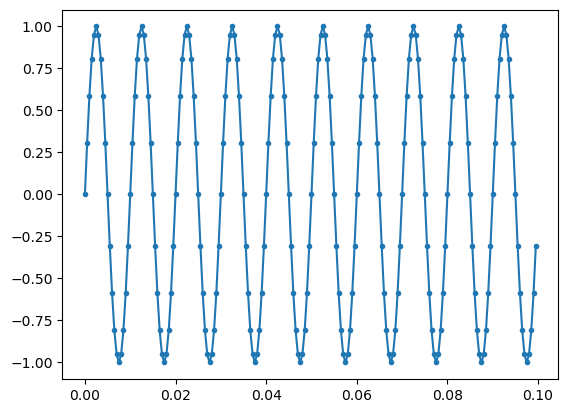

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 2000 # Sampling Frequency
tstep = 1/Fs # sample time interval
f0 = 100 # signal frequency

Cycles = 10
N = Cycles * Fs//f0 # number of samples

t = np.linspace(0, (N-1)*tstep, N)  # time steps

fstep = Fs/N

f = np.linspace(0, (N-1)*fstep, N) # frequency steps

y = 1 * np.sin( 2 * np.pi * f0 * t)

plt.plot(t,y, '.-')

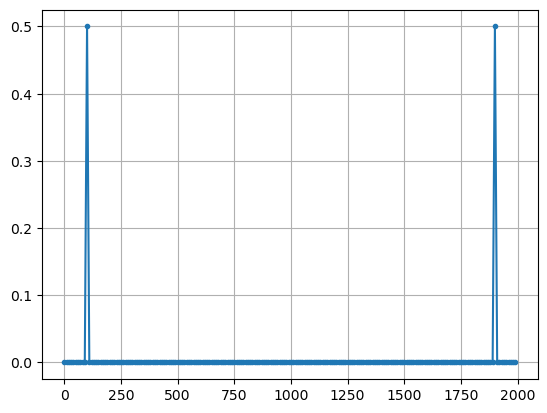

In [3]:
# perform fft
X = np.fft.fft(y)
X_mag = np.abs(X)/N
# plot fft mag vs freq
plt.plot(f,X_mag, '.-')
plt.grid()

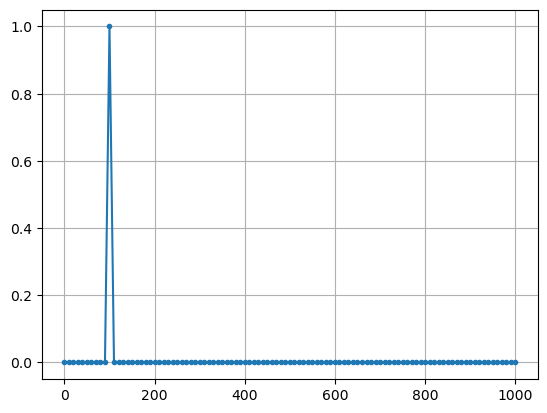

In [4]:
# consider Nyquist - only use half the sample freq
f_plot = f[0: int(N/2+1)]
X_mag_plot = 2 * X_mag[0: int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 # correct DC magnitude

plt.plot(f_plot,X_mag_plot, '.-')
plt.grid()

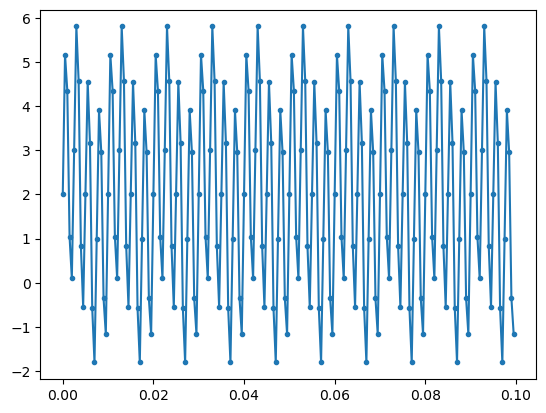

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 2000 # Sampling Frequency
tstep = 1/Fs # sample time interval
f0 = 100 # signal frequency

Cycles = 10
N = Cycles * Fs//f0 # number of samples

t = np.linspace(0, (N-1)*tstep, N)  # time steps

fstep = Fs/N

f = np.linspace(0, (N-1)*fstep, N) # frequency steps

y = 1 * np.sin( 2 * np.pi * f0 * t) + 3 * np.sin(4 * 2 * np.pi * f0 * t) + 2

plt.plot(t,y, '.-')

Text(0.5, 1.0, 'FFT - sample frequency 2000 Hz')

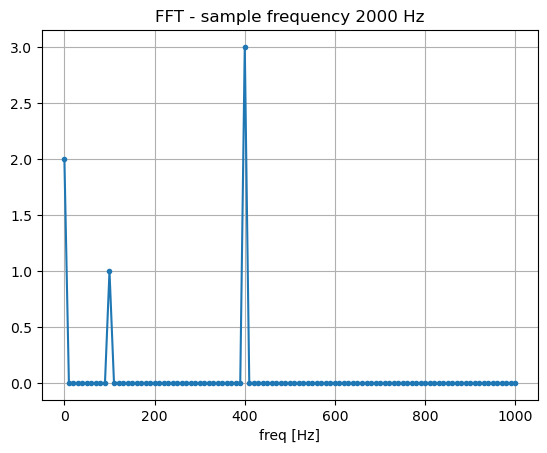

In [6]:
# perform fft
X = np.fft.fft(y)
X_mag = np.abs(X)/N
# consider Nyquist - only use half the sample freq
f_plot = f[0: int(N/2+1)]
X_mag_plot = 2 * X_mag[0: int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 # correct DC magnitude
plt.plot(f_plot,X_mag_plot, '.-')
plt.grid()
plt.xlabel("freq [Hz]")
plt.title("FFT - sample frequency 2000 Hz")

wobble [m] = -128.9392885002269 127.8741702518532


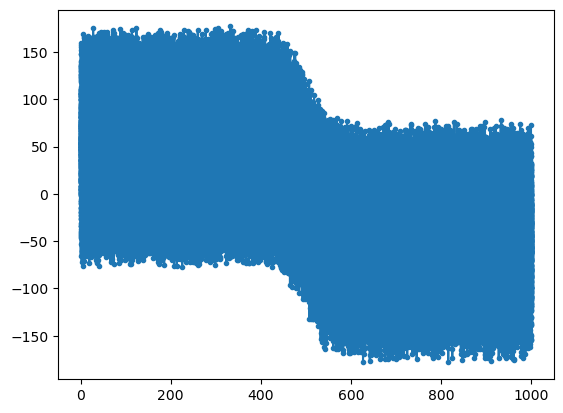

In [93]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 200 # Sampling Frequency
tstep = 1/Fs # sample time interval
f0 = 1 # signal frequency

Cycles = 1000
N = Cycles * Fs//f0 # number of samples

t = np.linspace(0, (N-1)*tstep, N)  # time steps

fstep = Fs/N

f = np.linspace(0, (N-1)*fstep, N) # frequency steps

d = -50 * np.tanh((t-500)/50)
d0 = np.tanh(t)
d1 = np.cos(2 * np.pi * 4 * t )
d2 = np.cos(2 * np.pi * .5 * t )

d_wobble = 100 * np.random.uniform(0, 1, N) * np.cos(2 * 1 * np.pi * t ) + 30  * np.random.uniform(0, 1, N) *np.cos(2 * 5 * np.pi * t )# inches
print("wobble [m] =", d_wobble.min(), d_wobble.max())
d = d + d_wobble

plt.scatter( t, d, s = 1)


#f = np.linspace(0, (N-1)*fstep, N) # frequency steps

y = d
# plt.xlim([490,510])
plt.plot(t,y, '.-')

Text(0.5, 1.0, 'FFT - sample frequency 1000 Hz')

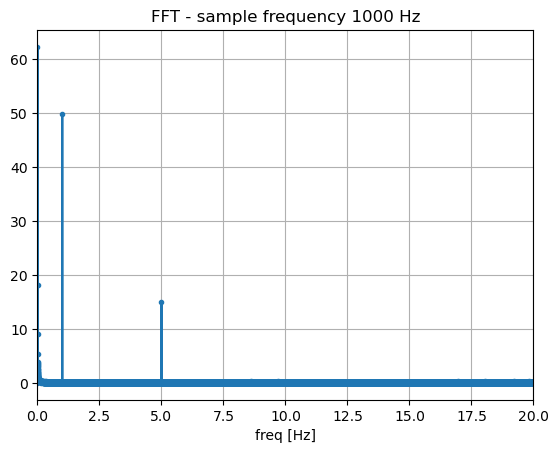

In [95]:
# perform fft
X = np.fft.fft(y)
X_mag = np.abs(X)/N
# consider Nyquist - only use half the sample freq
f_plot = f[0: int(N/2+1)]
X_mag_plot = 2 * X_mag[0: int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 # correct DC magnitude
plt.plot(f_plot,X_mag_plot, '.-')
plt.grid()
plt.xlabel("freq [Hz]")
plt.xlim([0,20])
plt.title("FFT - sample frequency 1000 Hz")

In [87]:
f_plot[np.where(X_mag_plot > 10)[0]]

array([1.e-03, 3.e-03, 1.e+00, 5.e+00])

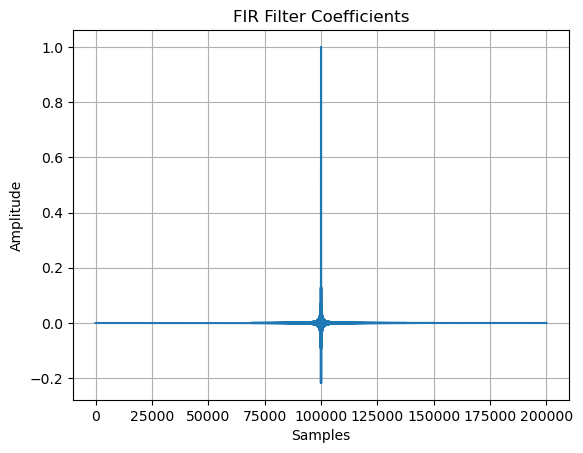

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def create_fir_filter(num_taps, cutoff_frequency, sampling_rate):
    # Normalized cutoff frequency
    normalized_cutoff = 2 * cutoff_frequency / sampling_rate

    # Create an array of tap indices
    indices = np.arange(-num_taps // 2, num_taps // 2 + 1)

    # Calculate the sinc filter
    sinc_filter = np.sinc(normalized_cutoff * indices)

    # Apply a window function (Hann window)
    window = np.hanning(len(sinc_filter))
    fir_filter = sinc_filter * window
    return fir_filter

num_taps = N+1 # 101
cutoff_frequency = 2 #10
sampling_rate = Fs #100
filter_coefficients = create_fir_filter(num_taps, cutoff_frequency, sampling_rate)
plt.plot(filter_coefficients)
plt.title('FIR Filter Coefficients')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

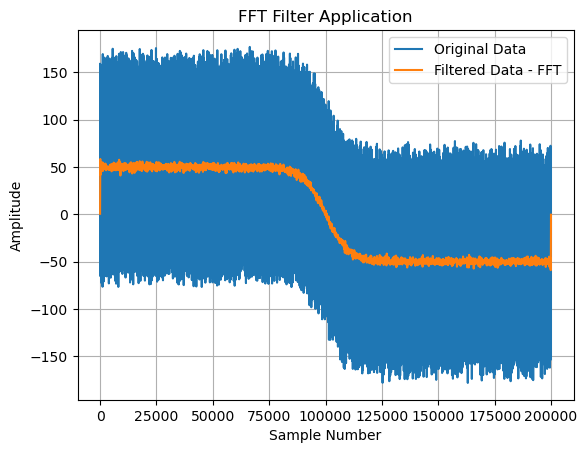

In [98]:
def fft_filter(data, cutoff_frequency, sampling_rate):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), d=1/sampling_rate)

    # Create a rectangular window (filter) in the frequency domain
    filter_mask = np.abs(frequencies) < cutoff_frequency

    # Apply the filter
    filtered_fft_data = fft_data * filter_mask

    # Perform inverse FFT
    filtered_data = np.fft.ifft(filtered_fft_data)
    return filtered_data.real

# Sample data

# Filter parameters
cutoff_frequency = 1
sampling_rate = Fs
filtered_data_fft = fft_filter(y, cutoff_frequency, sampling_rate)
plt.plot(y, label='Original Data')
plt.plot(filtered_data_fft, label='Filtered Data - FFT')
plt.title('FFT Filter Application')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()